In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix

# Load dataset
df = pd.read_csv('ripeness_dataset2.csv')

# Separate features and labels
X = df.filter(like='feature_')
y = df['label']

# Use original splits
X_train = X[df['split'] == 'train']
X_test = X[df['split'] == 'test']
y_train = y[df['split'] == 'train']
y_test = y[df['split'] == 'test']

# Naïve Bayes doesn't require feature scaling, but normalization can help
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Accuracy: 0.6655405405405406

Classification Report:
               precision    recall  f1-score   support

       Green       0.96      0.76      0.85       135
Green_Yellow       0.75      0.30      0.42        81
      Yellow       0.45      0.88      0.59        80

    accuracy                           0.67       296
   macro avg       0.72      0.64      0.62       296
weighted avg       0.76      0.67      0.66       296



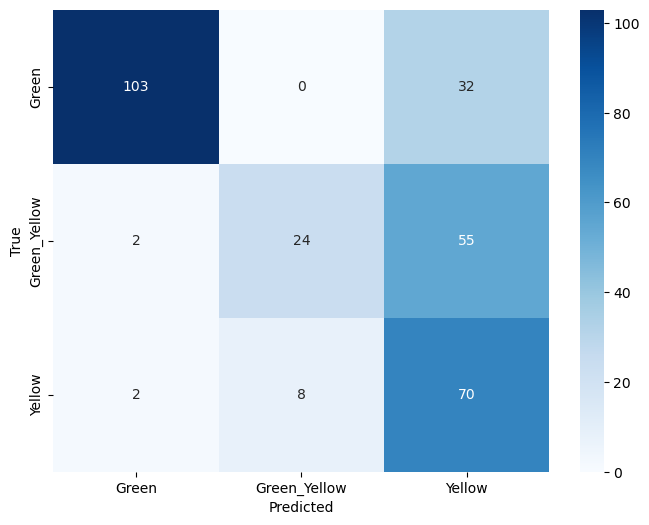

In [4]:
# Initialize and train
nb = GaussianNB()
nb.fit(X_train, y_train)

# Predict
y_pred = nb.predict(X_test)

# Evaluate
print("Accuracy:", nb.score(X_test, y_test))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=nb.classes_,
            yticklabels=nb.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()